In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('data/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
# Passengerid -> 삭제
# Pclass -> 사용
# Name -> 삭제
df.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [37]:
# Sex -> 사용
# Age -> 사용
# SibSp, Parch -> 사용
# Ticket -> 삭제
# Fare -> 사용
# Cabin -> NaN이 너무 많아 삭제
# Embarked ->사용
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
# 불필요한 컬럼 삭제
df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)

In [39]:
df.Name.str.split(',',expand=True)[1].str.split('.', expand=True)[0].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: 0, dtype: int64

In [40]:
#df.drop(['Name'], axis=1, inplace=True)

In [41]:
# NaN 값 처리
# Age -> 평균값으로 치환
df.Age.fillna(df.Age.mean(), inplace=True)
# Embarked
df.Embarked.fillna('N', inplace=True)

In [42]:
df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [43]:
# 데이터 인코딩 (문자여 피처 -> 숫자형 변환)
# df.info()
# Sex -> 라벨인코딩
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.Sex)
df.Sex=le.transform(df.Sex)

# le.fit_transform(df.Sex)
# fit()과 transform() 함수는 fit_transform()으로 한 번에 수행 가능

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [45]:
# Embarked -> 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
one.fit_transform(df.Embarked.values.reshape(-1,1))

<891x4 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [46]:
# OneHotEncoder보다는 pandas.get_dummies() 함수를 활용하는 걸 추천
pd.get_dummies(df.Embarked)

,C,N,Q,S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,1,0,0,0


In [47]:
one_embarked=pd.get_dummies(df.Embarked)
df = pd.concat([df, one_embarked], axis=1)

In [48]:
df.drop('Embarked', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,N,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,0,1


In [49]:
df.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [51]:
df['Sex2']=df.Name.str.split(',',expand=True)[1].str.split('.',expand=True)[0]

In [52]:
df.Sex2

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Sex2, Length: 891, dtype: object

In [53]:
df.Sex2 = df.Sex2.str.strip() # 앞뒤 공백 제거

In [54]:
df.Sex2 = df.Sex2.where(df.Sex2.isin(['Mr','Miss','Mrs','Master']), 'Unknown')

In [55]:
df.Sex2.value_counts()

Mr         517
Miss       182
Mrs        125
Master      40
Unknown     27
Name: Sex2, dtype: int64

In [56]:
age_mean = df.pivot_table(index='Sex2', aggfunc='mean', values='Age')

In [57]:
age_mean

,Age
Sex2,
Master,7.086662
Miss,23.341584
Mr,31.753762
Mrs,35.055080
Unknown,41.914782


In [58]:
df = df.mask((df.Age.isnull()) & (df.Sex2 == 'Master'), 7.09)
df = df.mask((df.Age.isnull()) & (df.Sex2 == 'Miss'), 23.34)
df = df.mask((df.Age.isnull()) & (df.Sex2 == 'Mr'), 31.75)
df = df.mask((df.Age.isnull()) & (df.Sex2 == 'Mrs'), 35.06)
df = df.mask((df.Age.isnull()) & (df.Sex2 == 'Unknown'), 41.91)

In [59]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,N,Q,S,Sex2
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,0,0,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,1,0,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,0,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,0,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,0,0,0,1,Unknown
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,0,0,0,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.4500,0,0,0,1,Miss
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,30.0000,1,0,0,0,Mr


In [60]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.drop(['Name','Sex2'], axis=1, inplace=True)

In [61]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,N,Q,S
0,0,3,1,22.000000,1,0,7.2500,0,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0,0


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [64]:
# 학습용 데이터와 테스트용 데이터 분리
df_X = df.drop('Survived', axis=1)
df_y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y)

In [65]:
# 1) 모델 객체 생성
dt = DecisionTreeClassifier()

# 2) 학습
dt.fit(X_train, y_train)

# 3) 평가
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9865269461077845
0.7847533632286996


In [68]:
# GridSearchCV 활용
params = {
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10]
}
grid_dt = GridSearchCV(dt, param_grid = params, cv=5)
grid_dt.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]})

In [70]:
print(grid_dt.score(X_train, y_train))
print(grid_dt.score(X_test, y_test))

0.8173652694610778
0.8026905829596412


In [71]:
grid_dt.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [72]:
grid_dt.cv_results_

{'mean_fit_time': array([0.00599613, 0.00359859, 0.00360465, 0.00499244, 0.00358925,
        0.00417585, 0.00478978, 0.00798688, 0.00458803]),
 'std_fit_time': array([0.00166342, 0.0004941 , 0.00082196, 0.00064518, 0.00046992,
        0.00039735, 0.00116752, 0.00384425, 0.00048563]),
 'mean_score_time': array([0.00297899, 0.00240035, 0.00217237, 0.0029788 , 0.0019959 ,
        0.00199232, 0.00239134, 0.00437989, 0.00349927]),
 'std_score_time': array([8.91627516e-04, 7.95190884e-04, 4.10348466e-04, 1.54878739e-03,
        3.95975866e-06, 4.15040114e-06, 4.85025505e-04, 1.84655343e-03,
        1.35206651e-03]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 5, 10, 2, 5, 10, 2, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
     

In [73]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [75]:
grid_dt.best_estimator_.feature_importances_

array([0.22526069, 0.61336067, 0.09855571, 0.        , 0.        ,
       0.06282293, 0.        , 0.        , 0.        , 0.        ])

In [76]:
pd.DataFrame({'feature':df_X.columns,
              'importance':grid_dt.best_estimator_.feature_importances_})

,feature,importance
0,Pclass,0.225261
1,Sex,0.613361
2,Age,0.098556
3,SibSp,0.000000
4,Parch,0.000000
5,Fare,0.062823
6,C,0.000000
7,N,0.000000
8,Q,0.000000
9,S,0.000000


<AxesSubplot:ylabel='feature'>

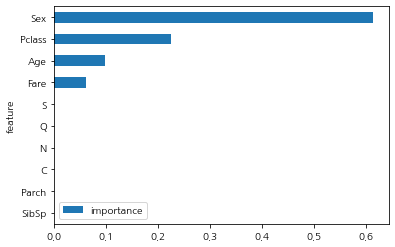

In [77]:
ft_imp = pd.DataFrame({'feature':df_X.columns,
              'importance':grid_dt.best_estimator_.feature_importances_})
ft_imp.sort_values(by='importance').plot(x='feature',y='importance',kind='barh')

In [78]:
# 결정트리 시각화
import graphviz
# pip install graphviz
from sklearn import tree

In [79]:
# 시각화를 위한 간단한 결정 트리 생성
dt1 = DecisionTreeClassifier(max_depth = 2)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [84]:
data = tree.export_graphviz(dt1,
                            feature_names=df_X.columns,
                           class_names=['Death','Survived'],
                           filled=True,
                           rounded=True)
data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="Sex <= 0.5\\ngini = 0.479\\nsamples = 668\\nvalue = [402, 266]\\nclass = Death", fillcolor="#f6d4bc"] ;\n1 [label="Pclass <= 2.5\\ngini = 0.379\\nsamples = 244\\nvalue = [62, 182]\\nclass = Survived", fillcolor="#7cbeee"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.088\\nsamples = 130\\nvalue = [6, 124]\\nclass = Survived", fillcolor="#43a2e6"] ;\n1 -> 2 ;\n3 [label="gini = 0.5\\nsamples = 114\\nvalue = [56, 58]\\nclass = Survived", fillcolor="#f8fcfe"] ;\n1 -> 3 ;\n4 [label="Pclass <= 1.5\\ngini = 0.318\\nsamples = 424\\nvalue = [340, 84]\\nclass = Death", fillcolor="#eba06a"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.483\\nsamples = 91\\nvalue = [54, 37]\\nclass = Death", fillcolor="#f7d7c1"] ;\n4 -> 5 ;\n6 [label="gini = 0.242\\nsamples = 333\\nvalue = [286, 47]\\n

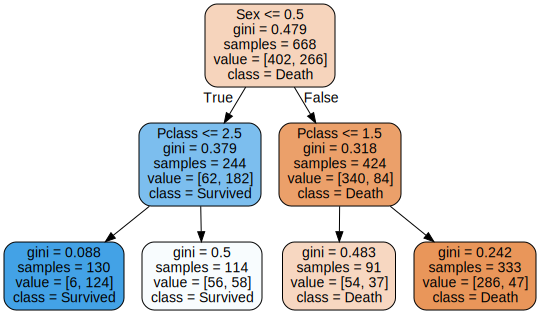

In [85]:
graph = graphviz.Source(data)
graph

In [86]:
graph.render('titanic_prediction') # pdf 파일로 생성됨

'titanic_prediction.pdf'